In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reviews=pd.read_csv("reviews_asheville.csv")
listing=pd.read_csv("listings_asheville.csv")

In [3]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,108061,553741,2011-09-21,822907,Pedro & Katie,"Lisa is superb hostess, she will treat you lik..."
1,108061,683278,2011-11-01,236064,Tim,This was a lovely little place walking distanc...
2,108061,714889,2011-11-13,1382707,Shane,"Lisa was very nice to work with. However, we ..."
3,108061,1766157,2012-07-21,416731,Brenda,I feel very lucky to have found this beautiful...
4,108061,2033065,2012-08-19,1858880,Lindsey,"Great roomy little apartment, beautiful privat..."


In [4]:
listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,108061,https://www.airbnb.com/rooms/108061,20220914194751,2022-09-14,city scrape,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental $1...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,...,4.79,4.84,4.48,NaN,f,2,2,0,0,0.67
1,155305,https://www.airbnb.com/rooms/155305,20220914194751,2022-09-14,city scrape,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,...,4.74,4.93,4.54,NaN,t,7,1,2,4,2.72
2,156805,https://www.airbnb.com/rooms/156805,20220914194751,2022-09-14,previous scrape,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,...,4.61,4.84,4.46,NaN,t,7,1,2,4,0.50
3,156926,https://www.airbnb.com/rooms/156926,20220914194751,2022-09-14,city scrape,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",This is a top bunk in the mixed dorm room<br /...,NaN,https://a0.muscache.com/pictures/98f4e655-c4d6...,746673,...,4.80,4.79,4.79,NaN,t,7,1,2,4,2.34
4,197263,https://www.airbnb.com/rooms/197263,20220914194751,2022-09-14,city scrape,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,961396,...,4.92,4.82,4.98,NaN,f,2,1,1,0,0.49


In [5]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
listing=listing[["id","name","host_id","host_name",'neighbourhood',"room_type",'property_type',"minimum_nights","maximum_nights",'availability_365','number_of_reviews_l30d','review_scores_rating','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','price', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value','availability_90']]

In [7]:
listing['price']=listing['price'].astype("str").str.replace("$","")
listing['price']=listing['price'].astype('str').str.replace(',','')
listing['price']=listing['price'].astype('float')

C:\Users\bhart\AppData\Local\Temp\ipykernel_27220\622587329.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing['price']=listing['price'].astype("str").str.replace("$","")


In [8]:
listing.head()

,id,name,host_id,host_name,neighbourhood,room_type,property_type,minimum_nights,maximum_nights,availability_365,...,reviews_per_month,calculated_host_listings_count,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability_90
0,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,"Asheville, North Carolina, United States",Entire home/apt,Entire rental unit,30,365,310,...,0.67,2,120.0,4.56,4.70,4.85,4.79,4.84,4.48,35
1,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,"Asheville, North Carolina, United States",Entire home/apt,Entire guesthouse,1,365,84,...,2.72,7,100.0,4.70,4.41,4.83,4.74,4.93,4.54,64
2,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,"Asheville, North Carolina, United States",Private room,Private room in home,1,365,0,...,0.50,7,66.0,4.73,4.43,4.76,4.61,4.84,4.46,0
3,156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,NaN,Shared room,Shared room in hostel,1,365,106,...,2.34,7,30.0,4.82,4.67,4.85,4.80,4.79,4.79,86
4,197263,Tranquil Room & Private Bath,961396,Timo,NaN,Private room,Private room in home,2,4,70,...,0.49,2,45.0,4.98,5.00,4.95,4.92,4.82,4.98,70


In [9]:
listing.dropna(inplace=True)

In [11]:
listing.to_csv("listing_asheville.csv")

In [12]:
listing.last_review=pd.to_datetime(listing.last_review)

In [13]:
max(listing.last_review)

Timestamp('2022-09-14 00:00:00')

In [14]:
min(listing.last_review)

Timestamp('2016-07-04 00:00:00')

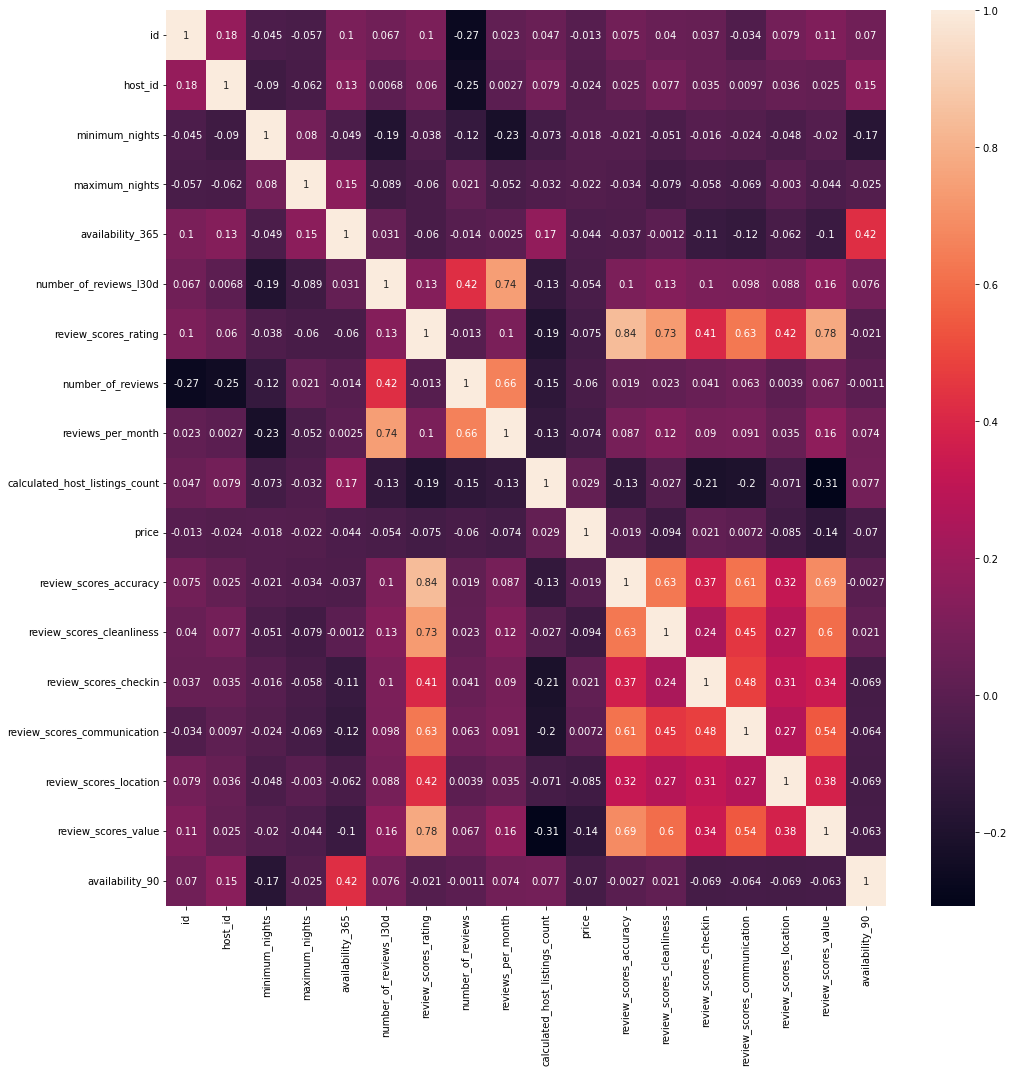

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(listing.corr(),annot=True)
plt.tight_layout()

In [16]:
listing['month_year'] = listing['last_review'].dt.to_period('M')

In [18]:
listing_covid=listing[(listing.month_year>"2020-03") & (listing.month_year<="2020-12")]

In [19]:
listing_noncovid=listing[(listing.month_year>"2020-12") & (listing.month_year<="2021-09")]

In [20]:
listing_covid.groupby('room_type').mean()

,id,host_id,minimum_nights,maximum_nights,availability_365,number_of_reviews_l30d,review_scores_rating,number_of_reviews,reviews_per_month,calculated_host_listings_count,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability_90
room_type,,,,,,,,,,,,,,,,,,
Entire home/apt,2.922440e+07,1.379915e+08,8.125000,367.791667,63.333333,0.0,4.892500,39.666667,0.737083,1.333333,170.125000,4.935000,4.855833,4.961667,4.963333,4.888750,4.844167,12.708333
Private room,3.212377e+07,1.322785e+08,1.153846,490.692308,130.692308,0.0,4.923846,68.307692,0.992308,3.307692,225.615385,4.938462,4.863077,4.986923,4.980000,4.936154,4.783846,20.000000
Shared room,3.242546e+07,6.659254e+07,3.000000,28.000000,0.000000,0.0,5.000000,3.000000,0.070000,2.000000,40.000000,5.000000,4.670000,5.000000,5.000000,5.000000,5.000000,0.000000


In [21]:
listing_noncovid.groupby('room_type').mean()

,id,host_id,minimum_nights,maximum_nights,availability_365,number_of_reviews_l30d,review_scores_rating,number_of_reviews,reviews_per_month,calculated_host_listings_count,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability_90
room_type,,,,,,,,,,,,,,,,,,
Entire home/apt,3.197892e+07,1.203107e+08,19.333333,521.205128,86.897436,0.0,4.851795,40.230769,0.750000,8.153846,141.871795,4.899231,4.881795,4.947692,4.927692,4.903590,4.827692,18.487179
Hotel room,2.372085e+07,1.758715e+08,1.000000,365.000000,194.166667,0.0,4.941667,17.333333,0.333333,7.000000,549.500000,4.925000,4.953333,4.963333,4.905000,4.951667,4.900000,34.833333
Private room,2.432974e+07,9.971780e+07,3.055556,352.222222,134.222222,0.0,4.723333,32.000000,0.523889,3.611111,220.888889,4.741667,4.678889,4.975556,4.846667,4.922222,4.603333,35.388889


In [29]:
reviews_aftercovid=reviews[(reviews.date>='2021-04-30')& (reviews.date<='2021-07-31')]

In [30]:
reviews_covid=reviews[(reviews.date>='2020-03-31')& (reviews.date<='2021-12-31')]

In [31]:
reviews_covid.shape

(102762, 6)

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in reviews_covid.comments:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 


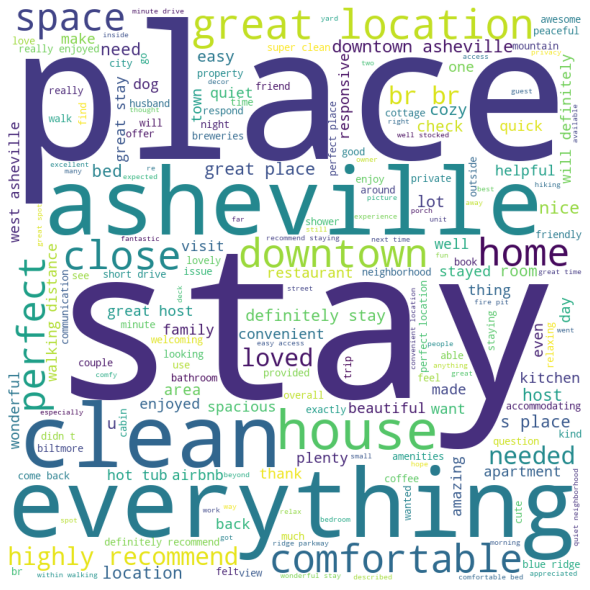

In [33]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [63]:
reviews_aftercovid=reviews[(reviews.date>='2021-04-30')& (reviews.date<='2021-07-31')]

In [34]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in reviews_aftercovid.comments:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

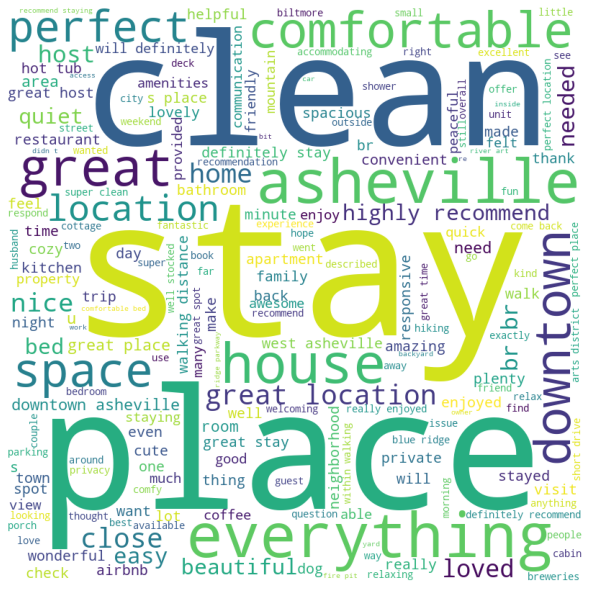

In [35]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()